# The Problem Docker Solves

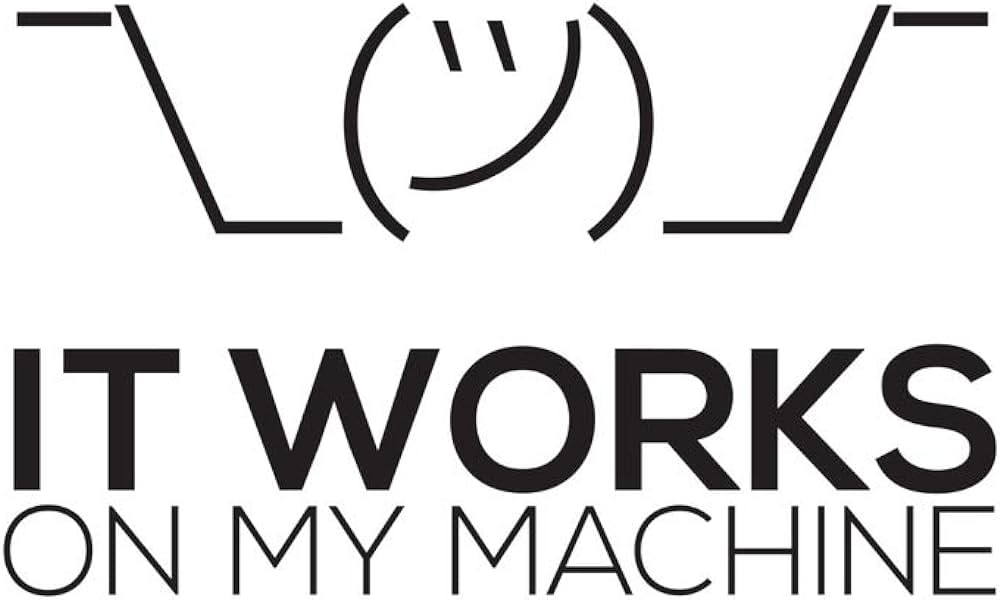

# What is Docker?

The Build-Ship-Run Framework

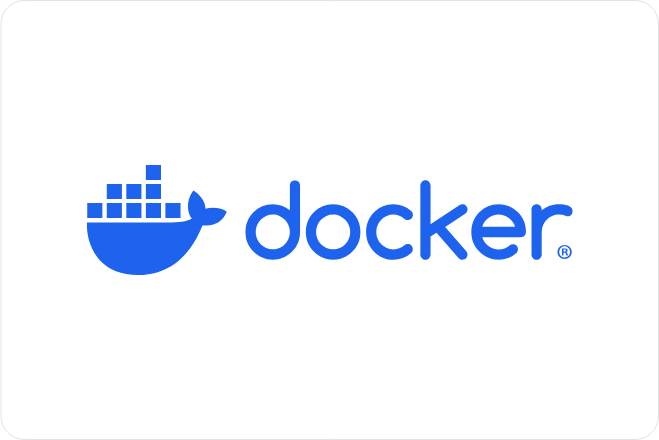

[Docker and Shipping Container Analogy](https://medium.com/@akash.66.agarwal/a-simple-understanding-of-docker-analogy-with-cargo-ship-72fe0de49a6b)

[Docker hub](https://hub.docker.com/)

# Access Docker

[Install Docker on your Local](https://www.geeksforgeeks.org/docker-tutorial/#inst)

Or

[Play with Docker](https://labs.play-with-docker.com/)

# Key Concepts
**Images:** Think of an image as a blueprint for your containers. It's a snapshot of your application and its dependencies. In our analogy, this is like the manifest and packing list for a shipping container.

**Containers:** A container is an instance of an image. It's a runnable unit of software. Containers are isolated from each other and the host system, ensuring consistency. This is akin to the shipping containers that hold and protect cargo.

**Dockerfile:** This is a text file that contains a series of instructions on how to build a Docker image. It's like a recipe for creating the container’s environment.

**Docker Hub:** A cloud-based repository where you can store and share Docker images, similar to GitHub but for container images. It's like a distribution center for shipping containers.

Alright, let's dive into Docker commands. Docker commands can be thought of as instructions to manage your Docker environment. Here’s a structured overview of essential Docker commands, grouped by their functionality.



### Docker Command Categories

1. **Basic Commands**
2. **Image Management**
3. **Container Management**
4. **Volume Management**

### Basic Commands

#### `docker version`

```sh
docker version
```

#### `docker info`

```sh
docker info
```

### Image Management Commands

#### `docker pull`
- **Analogy**: Ordering a pre-packed shipping container from a supplier.
- **Usage**: Downloads an image from Docker Hub or another Docker registry.

```sh
docker pull <image_name>
# Example
docker pull python:3.8-slim
```

#### `docker images`
- **Analogy**: Listing all the shipping container blueprints you have.
- **Usage**: Lists all images available on your system.

```sh
docker images
```

#### `docker rmi`
- **Analogy**: Discarding an old or unused shipping container blueprint.
- **Usage**: Removes one or more images.

```sh
docker rmi <image_name>
# Example
docker rmi my-python-app
```

### Container Management Commands

#### `docker run`
- **Analogy**: Launching a shipping container on its journey.
- **Usage**: Creates and starts a new container from an image.

```sh
docker run <options> <image_name> <command>
# Example
docker run my-python-image
```

Common options:
- `-it`: Interactive terminal (useful for running containers interactively).
- `-d`: Detached mode (runs the container in the background).
- `--name`: Assigns a name to the container.

```sh
docker run -d -it --name my-container my-python-app
```

#### `docker ps`
- **Analogy**: Checking the status of your active shipping containers.
- **Usage**: Lists all running containers.

```sh
docker ps
```

Add `-a` to see all containers, including stopped ones:

```sh
docker ps -a
```

#### `docker stop`
- **Analogy**: Halting a shipping container mid-journey.
- **Usage**: Stops a running container.

```sh
docker stop <container_id_or_name>
# Example
docker stop my-container
```

#### `docker rm`
- **Analogy**: Disposing of a stopped shipping container.
- **Usage**: Removes a stopped container.

```sh
docker rm <container_id_or_name>
# Example
docker rm my-container
```

#### `docker exec`
- **Analogy**: Inspecting or modifying cargo inside a running shipping container.
- **Usage**: Runs a command in a running container.

```sh
docker exec -it <container_id_or_name> <command>
# Example
docker exec -it my-container /bin/bash
```

### Volume Management Commands

#### `docker volume create`
- **Analogy**: Setting up a storage unit to keep cargo safe.
- **Usage**: Creates a volume to persist data.

```sh
docker volume create <volume_name>
# Example
docker volume create my-volume
```

#### `docker volume ls`
- **Analogy**: Listing all storage units you have.
- **Usage**: Lists all volumes.

```sh
docker volume ls
```

#### `docker volume rm`
- **Analogy**: Discarding a storage unit.
- **Usage**: Removes a volume.

```sh
docker volume rm <volume_name>
# Example
docker volume rm my-volume
```

### Summary

Here’s a quick summary of the most frequently used Docker commands:

- **Image Management**: `docker pull`, `docker build`, `docker images`, `docker rmi`
- **Container Management**: `docker run`, `docker ps`, `docker stop`, `docker rm`, `docker exec`
- **Volume Management**: `docker volume create`, `docker volume ls`, `docker volume rm`

### Practice Exercise

To get hands-on practice, let us try the following steps:

1. **Pull an image**: `docker pull python:3.8-slim`
2. **List images**: `docker images`
3. **Run a container interactively**: `docker run -it python:3.8-slim /bin/bash`
4. **Create a volume**: `docker volume create my-volume`
5. **Run a container with a volume**: `docker run -it -v my-volume:/data python:3.8-slim /bin/bash`



# Dockerfile & Docker build

Sure, let's walk through a detailed example of creating a `Dockerfile` and building a Docker image from it. We'll create a simple Flask web application as an example.

### Step-by-Step Guide

#### Step 1: Create the Project Directory

First, create a directory for your project and navigate into it:

```sh
mkdir flask-app
cd flask-app
```

#### Step 2: Create the Flask Application
```sh
touch app.py
vim app.py
```

Create a new file named `app.py` with the following content:



```python
from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)
```

This is a simple Flask application that returns "Hello, World!" when accessed.

#### Step 3: Create the Requirements File
```sh
touch requirements.txt
vim requirements.txt
```

Create a file named `requirements.txt` with the following content:

```
Flask==2.0.1
Werkzeug==2.2.2
```

This file lists the dependencies for your Flask application.

#### Step 4: Create the Dockerfile
```sh
touch Dockerfile
vim Dockerfile
```

Create a file named `Dockerfile` (without any file extension) in the same directory with the following content:

```dockerfile
# Use an official Python runtime as a parent image
FROM python:3.8-slim

# Set the working directory in the container
WORKDIR /app

# Copy the current directory contents into the container at /app
COPY . /app

# Install any needed packages specified in requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

# Make port 5000 available to the world outside this container
EXPOSE 5000

# Define environment variable
ENV NAME World

# Run app.py when the container launches
CMD ["python", "app.py"]
```

Here's a breakdown of each line:

- `FROM python:3.8-slim`: Uses a lightweight version of Python 3.8 as the base image.
- `WORKDIR /app`: Sets the working directory inside the container to `/app`.
- `COPY . /app`: Copies the current directory contents (where the Dockerfile is) into `/app` in the container.
- `RUN pip install --no-cache-dir -r requirements.txt`: Installs the required Python packages.
- `EXPOSE 5000`: Exposes port 5000 on the container to allow communication with the Flask app.
- `ENV NAME World`: Sets an environment variable.
- `CMD ["python", "app.py"]`: Specifies the command to run when the container starts.

#### Step 5: Build the Docker Image

Open a terminal in the project directory and run the following command to build the Docker image:

```sh
docker build -t flask-app .
```

Here's what each part of the command means:

- `docker build`: Tells Docker to build an image.
- `-t flask-app`: Tags the image with the name `flask-app`.
- `.`: Specifies the current directory as the context for the build.

Docker will read the `Dockerfile`, execute the instructions, and build the image. You should see output similar to this:

```
Sending build context to Docker daemon  4.096kB
Step 1/7 : FROM python:3.8-slim
 ---> c494fb280909
Step 2/7 : WORKDIR /app
 ---> Using cache
 ---> 8d203c6cd07b
Step 3/7 : COPY . /app
 ---> 4d2c6db7591c
Step 4/7 : RUN pip install --no-cache-dir -r requirements.txt
 ---> Running in 2d3bf4b2d6c6
Collecting Flask==2.0.1
  Downloading Flask-2.0.1-py3-none-any.whl (94 kB)
Collecting Jinja2>=3.0
  Downloading Jinja2-3.0.1-py3-none-any.whl (133 kB)
...
Successfully built 4d2c6db7591c
Successfully tagged flask-app:latest
```

#### Step 6: Run the Docker Container

After building the image, you can run a container using the following command:

```sh
docker run -p 5000:5000 flask-app
```

Here's what each part of the command means:

- `docker run`: Tells Docker to run a container.
- `-p 5000:5000`: Maps port 5000 on the host to port 5000 on the container.
- `flask-app`: Specifies the image to use.

Once the container is running, you should see output similar to this:

```
 * Serving Flask app "app" (lazy loading)
 * Environment: production
   WARNING: This is a development server. Do not use it in a production deployment.
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.17.0.2:5000 (Press CTRL+C to quit)
```

#### Step 7: Access the Application

Open a web browser and go to `http://localhost:5000`. You should see "Hello, World!" displayed.

### Summary of Docker Commands

1. **Build the image**:
    ```sh
    docker build -t flask-app .
    ```

2. **Run the container**:
    ```sh
    docker run -p 5000:5000 flask-app
    ```

